In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta, time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# !pip install -U pandas-profiling

In [3]:
# 데이터 세트 로드

url = 'https://raw.githubusercontent.com/gentle-potato/21KDT-Project/master/DataAnalysis%26Visualization/%EA%B8%B0%ED%9B%84%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EB%AA%A8%EA%B8%B0%20%EB%B0%9C%EC%83%9D%20%EC%98%88%EB%B3%B4/%EC%9E%91%EC%97%85/4.%20dms_seoul_avg.csv'
mosquitoDF = pd.read_csv(url, encoding='cp949')
mosquitoDF['date'] = pd.to_datetime(mosquitoDF['date'])
mosquitoDF

,date,mosquito,temp,rain_per_day,accum_rain,wind,humidity,sunshine
0,2015-04-06,199,12.214286,5.285714,0,3.371429,68.757143,8.880000
1,2015-04-07,146,11.571429,4.928571,0,3.428571,65.742857,9.891429
2,2015-04-08,90,10.914286,4.571429,0,3.257143,63.542857,9.927143
3,2015-04-09,172,10.171429,0.571429,0,2.871429,59.614286,10.884286
4,2015-04-10,249,10.314286,0.071429,0,2.871429,53.485714,12.777143
...,...,...,...,...,...,...,...,...
1168,2020-10-27,535,11.942857,0.000000,0,2.185714,63.242857,12.734286
1169,2020-10-28,884,11.900000,0.000000,0,2.271429,60.771429,14.241429
1170,2020-10-29,695,11.514286,0.000000,0,2.157143,57.100000,14.635714
1171,2020-10-30,543,11.985714,0.000000,0,1.942857,55.871429,14.294286


In [4]:
mosquitoDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1173 non-null   datetime64[ns]
 1   mosquito      1173 non-null   int64         
 2   temp          1173 non-null   float64       
 3   rain_per_day  1173 non-null   float64       
 4   accum_rain    1173 non-null   int64         
 5   wind          1173 non-null   float64       
 6   humidity      1173 non-null   float64       
 7   sunshine      1173 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 73.4 KB


In [5]:
mosquitoDF['year'] = mosquitoDF['date'].apply(lambda x : x.year)
mosquitoDF['month'] = mosquitoDF['date'].apply(lambda x : x.month)
mosquitoDF['day'] = mosquitoDF['date'].apply(lambda x : x.day)

In [6]:
dataset = mosquitoDF.loc[:,'mosquito' :].astype('float')
dataset.isnull().sum()

mosquito        0
temp            0
rain_per_day    0
accum_rain      0
wind            0
humidity        0
sunshine        0
year            0
month           0
day             0
dtype: int64

In [7]:
train = mosquitoDF.iloc[:round(len(mosquitoDF)*0.7)]
test = mosquitoDF.iloc[round(len(mosquitoDF)*0.7):]

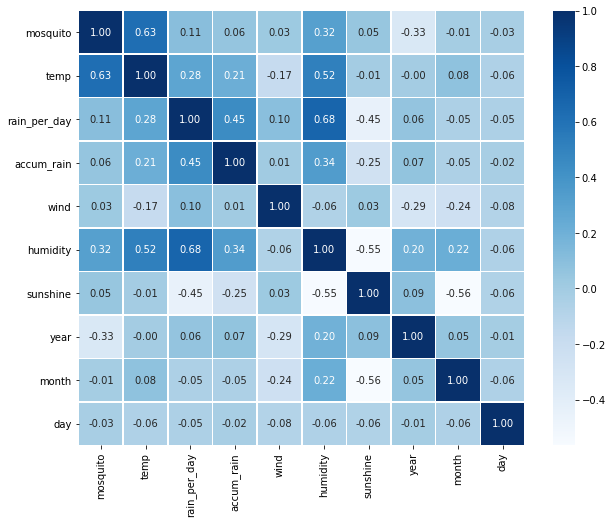

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data=mosquitoDF.corr(method='spearman'), annot=True,fmt='.2f', linewidths=.5, cmap='Blues')

In [9]:
dataset.columns

Index(['mosquito', 'temp', 'rain_per_day', 'accum_rain', 'wind', 'humidity',
       'sunshine', 'year', 'month', 'day'],
      dtype='object')

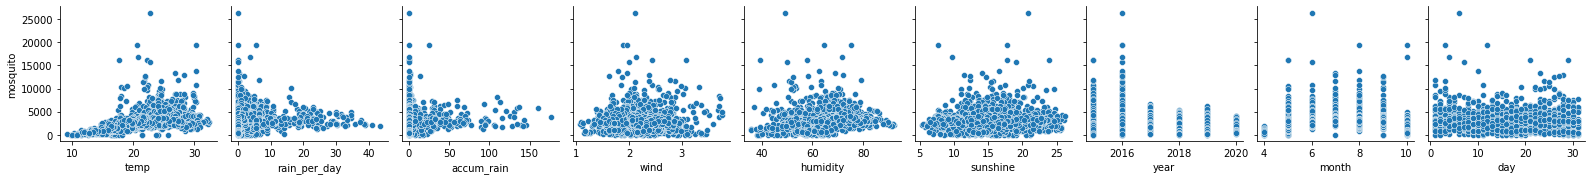

In [10]:
sns.pairplot(dataset, x_vars=['temp', 'rain_per_day', 'accum_rain', 'wind',
       'humidity', 'sunshine', 'year', 'month', 'day'],y_vars=['mosquito'])

In [11]:
dataset.head()

,mosquito,temp,rain_per_day,accum_rain,wind,humidity,sunshine,year,month,day
0,199.0,12.214286,5.285714,0.0,3.371429,68.757143,8.880000,2015.0,4.0,6.0
1,146.0,11.571429,4.928571,0.0,3.428571,65.742857,9.891429,2015.0,4.0,7.0
2,90.0,10.914286,4.571429,0.0,3.257143,63.542857,9.927143,2015.0,4.0,8.0
3,172.0,10.171429,0.571429,0.0,2.871429,59.614286,10.884286,2015.0,4.0,9.0
4,249.0,10.314286,0.071429,0.0,2.871429,53.485714,12.777143,2015.0,4.0,10.0


In [12]:
X_train = dataset.iloc[:round(len(dataset)*0.85),1:-1] 
y_train = dataset.iloc[:round(len(dataset)*0.85),0]
X_test = dataset.iloc[round(len(dataset)*0.85):,1:-1]
y_test = dataset.iloc[round(len(dataset)*0.85):,0]

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [15]:
def models(name = '', train_x = '', train_y = '', test_x = '', test_y = '', SVR_C = 1000.0, gbr_n = 10) :

  svr = make_pipeline(StandardScaler(), SVR(C=SVR_C, epsilon=0.2))
  svr.fit(train_x, train_y)
  print(svr)
  print(f"SVM 훈련 세트 점수: {svr.score(train_x, train_y)} \nSVM 테스트 세트 점수 : {svr.score(test_x, test_y)}") # R^2

  gbr = GradientBoostingRegressor(n_estimators= gbr_n)
  gbr.fit(train_x, train_y)
  print(gbr)
  print(f"GBR 훈련 세트 점수: {gbr.score(train_x, train_y)} \nGBR 테스트 세트 점수 : {gbr.score(test_x, test_y)}") 
  
  dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
  # dt_reg = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=0, max_depth=4))
  rf_reg = RandomForestRegressor(random_state=0, max_depth=2, n_estimators=50)
  gb_reg = GradientBoostingRegressor(random_state=0, max_depth=2, n_estimators=10)
  xgb_reg = XGBRegressor(random_state=0, max_depth=2, n_estimators=5)
  lgb_reg = LGBMRegressor(random_state=0, max_depth=-1, n_estimators=10)
  et_reg = ExtraTreesRegressor(random_state=0, max_depth=3, n_estimators=50)

  models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg, et_reg]
  for model in models:
      model.fit(train_x, train_y)
      print(f"{model} \n훈련 세트 점수: {model.score(train_x, train_y)} \n테스트 세트 점수 : {model.score(test_x, test_y)}") 

  prediction_svm = svr.predict(test_x)
  prediction_gbr = gbr.predict(test_x)
  prediction_dt_reg = dt_reg.predict(test_x)
  prediction_rf_reg = rf_reg.predict(test_x)
  prediction_gb_reg = gb_reg.predict(test_x)
  prediction_xgb_reg = xgb_reg.predict(test_x)
  prediction_lgb_reg = lgb_reg.predict(test_x)
  prediction_et_reg = et_reg.predict(test_x)

  df = pd.DataFrame({'result' : test_y, name + 'SVM' : prediction_svm, name + 'gbr' : prediction_gbr, name  +'dt_reg' : prediction_dt_reg , name +'rf_reg' : prediction_rf_reg, name +'gb_reg' : prediction_gb_reg,
                     name +'xgb_reg' : prediction_xgb_reg, name + 'lgb_r' : prediction_lgb_reg, name + 'et_reg' : prediction_et_reg })
  
  return df

In [16]:
df = models('test', X_train, y_train, X_test, y_test)
df.head()

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
SVM 훈련 세트 점수: 0.4989285938822836 
SVM 테스트 세트 점수 : 0.4914278797223842
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='deprecated',
                          r

,result,testSVM,testgbr,testdt_reg,testrf_reg,testgb_reg,testxgb_reg,testlgb_r,testet_reg
997,831.0,1110.157961,2733.084879,2433.470588,2853.957902,2928.949643,1139.222168,2329.771059,2317.793370
998,785.0,1022.491518,2733.084879,2433.470588,2818.173958,2928.949643,1139.222168,2309.502078,2146.573536
999,1176.0,781.968425,2603.637706,2433.470588,1946.900567,2574.449573,846.013062,2190.369610,2111.434525
1000,1625.0,780.031342,2271.463271,935.485714,1380.197437,2289.241855,562.396790,2093.120328,2056.331833
1001,1328.0,802.586149,2078.650129,935.485714,1231.186544,2046.726403,429.892822,2026.369848,1956.677458


In [17]:
df['time'] = mosquitoDF['date']
df = df.set_index('time', drop = True)
df.head()

,result,testSVM,testgbr,testdt_reg,testrf_reg,testgb_reg,testxgb_reg,testlgb_r,testet_reg
time,,,,,,,,,
2020-05-09,831.0,1110.157961,2733.084879,2433.470588,2853.957902,2928.949643,1139.222168,2329.771059,2317.793370
2020-05-10,785.0,1022.491518,2733.084879,2433.470588,2818.173958,2928.949643,1139.222168,2309.502078,2146.573536
2020-05-11,1176.0,781.968425,2603.637706,2433.470588,1946.900567,2574.449573,846.013062,2190.369610,2111.434525
2020-05-12,1625.0,780.031342,2271.463271,935.485714,1380.197437,2289.241855,562.396790,2093.120328,2056.331833
2020-05-13,1328.0,802.586149,2078.650129,935.485714,1231.186544,2046.726403,429.892822,2026.369848,1956.677458


In [18]:
df.tail()

,result,testSVM,testgbr,testdt_reg,testrf_reg,testgb_reg,testxgb_reg,testlgb_r,testet_reg
time,,,,,,,,,
2020-10-27,535.0,166.656084,1600.994506,232.586207,843.366704,1856.389967,429.892822,1434.284721,922.954682
2020-10-28,884.0,231.273031,1600.994506,232.586207,843.366704,1856.389967,429.892822,1434.284721,922.954682
2020-10-29,695.0,145.092522,1600.994506,232.586207,843.366704,1856.389967,429.892822,1434.284721,912.677152
2020-10-30,543.0,81.386897,1600.994506,232.586207,843.366704,1856.389967,429.892822,1434.284721,948.807740
2020-10-31,454.0,116.362639,1600.994506,652.800000,843.366704,1856.389967,429.892822,1582.137759,1035.350784


In [19]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100

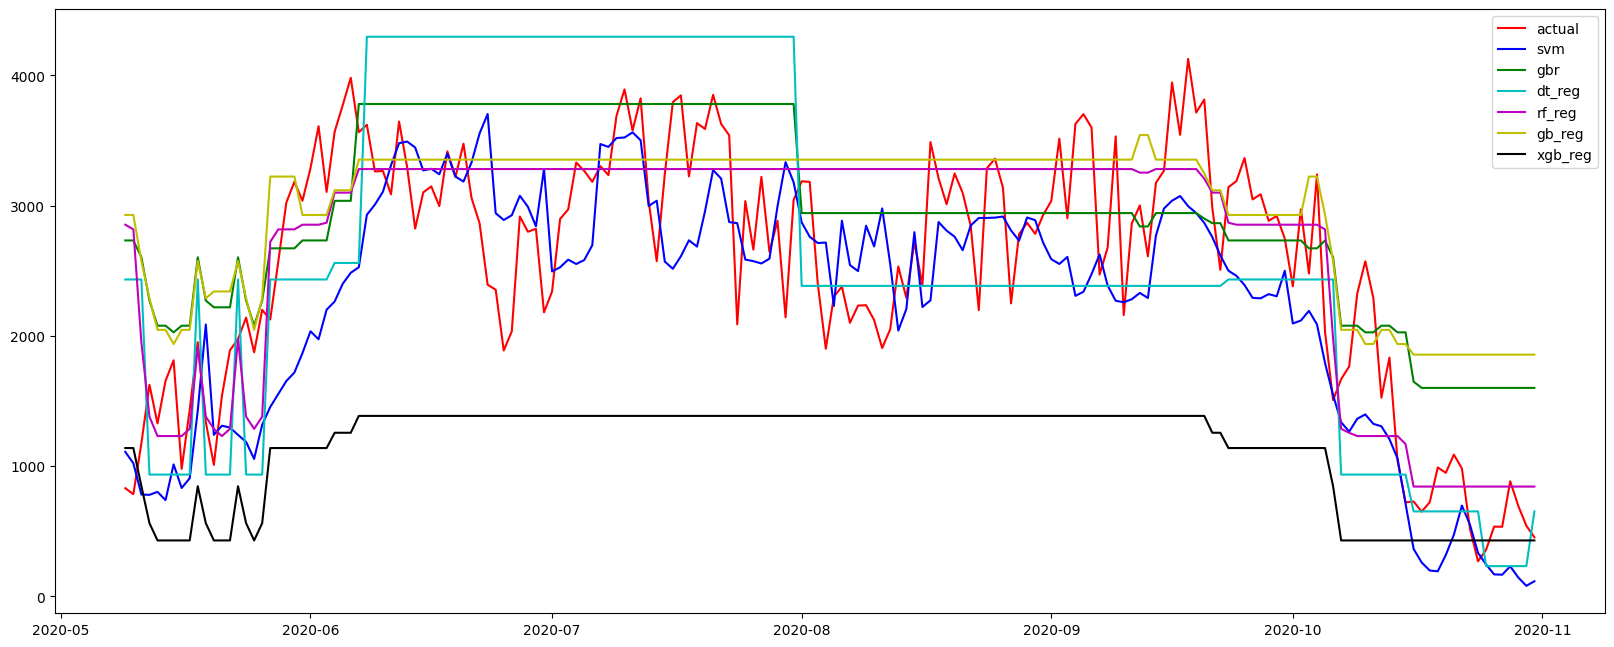

In [20]:
plt.plot(df.result,'r', label = 'actual')
plt.plot(df.testSVM, 'b', label = 'svm')
plt.plot(df.testgbr, 'g', label = 'gbr')
plt.plot(df.testdt_reg, 'c', label = 'dt_reg')
plt.plot(df.testrf_reg, 'm', label = 'rf_reg')
plt.plot(df.testgb_reg, 'y', label = 'gb_reg')
plt.plot(df.testxgb_reg	, 'k', label = 'xgb_reg')
# plt.plot(df.testlgb_r, 'k', label = 'lgb_r')
plt.legend()
plt.show()